## STA 141B, Lecture 13

## Data Munging


## US College Scorecard data

- national college scorecard dataset: https://collegescorecard.ed.gov/data/ 
- dataset is a large comparison of accredited colleges and universities in the U.S

> The College Scorecard is designed to increase transparency, putting the power in the hands of the public — from those choosing colleges to those improving college quality — to see how well different schools are serving their students.

In [1]:
import pandas as pd
import numpy as np

datadir = "data"
COL = pd.read_csv(datadir + '/MERGED2009_10_PP.csv')
col_dna = COL.dropna(axis=1)
col_dtypes = dict(col_dna.dtypes.replace({np.dtype('int64'):np.dtype('float64')})) # make the dtypes floats
col_dtypes['UNITID'] = np.dtype('int64') # convert the UNITID back to int
vars_interest = ['ADM_RATE','UGDS','TUITIONFEE_IN','TUITIONFEE_OUT','MN_EARN_WNE_P10'] # Include these vars
col_dtypes.update({a: np.dtype('float64') for a in vars_interest}) # make them floats

/home/phileas/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,6,1351,1365,1377,1378,1407,1408,1411,1426,1431,1432,1433,1445,1446,1447,1461,1489,1537,1538,1539,1540,1541,1542,1547,1548,1549,1553,1554,1559,1560,1561,1562,1563,1567,1568,1571,1572,1573,1574,1606,1609,1610,1611,1613,1614,1615,1616,1636,1637,1711,1723,1724,1729,1909,1910,1911,1912,1913) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
## Apply what we learned to all data files

def read_cs_data(year,col_dtypes,datadir):
    """read a CollegeScorecard dataframe"""
    nextyr = str(int(year) + 1)[-2:]
    filename = datadir + '/MERGED{}_{}_PP.csv'.format(year,nextyr)
    col = pd.read_csv(filename,na_values='PrivacySuppressed',
                      dtype=col_dtypes,usecols=col_dtypes.keys())
    col['Year'] = pd.Period(str(int(year) + 1),freq='Y')
    return col

In [3]:
## pd.concat stacks DataFrames (append rows)

col = pd.concat((read_cs_data(str(y),col_dtypes,datadir) for y in range(1996,2017))) # gen exp
col = col.set_index(['UNITID','Year']) # set multi index

In [4]:
col.head()

,,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,ICLEVEL,OPEFLAG
UNITID,Year,,,,,,,,,,,,,,,,,,,,
100636,1997,01230800,12308.0,Community College of the Air Force,Montgomery,AL,36114-3011,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,44141.0,NaN,NaN,NaN,2.0,1.0
100654,1997,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,4.0,1.0,1.0,5.0,NaN,3852.0,NaN,NaN,NaN,1.0,1.0
100663,1997,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,2.0,3.0,4.0,1.0,1.0,5.0,NaN,9889.0,NaN,NaN,NaN,1.0,1.0
100672,1997,00574900,5749.0,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,1.0,1.0,1.0,2.0,1.0,1.0,5.0,NaN,295.0,NaN,NaN,NaN,2.0,1.0
100690,1997,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,4.0,2.0,1.0,5.0,NaN,60.0,NaN,NaN,NaN,1.0,1.0


In [5]:
## Find UC Davis

col_large = col[col['UGDS'] > 1000] # Filter with boolean indexing
davis = col_large.query('CITY=="Davis" and STABBR=="CA"') # .query finds rows satisfying expression
davis = davis.reset_index(level=0) # access index via level

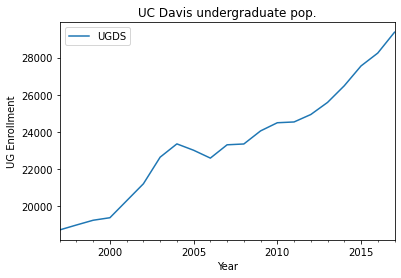

In [6]:
## Plot davis
import matplotlib.pyplot as plt

ax = davis.plot(y='UGDS') # dataframe.plot()!
ax.set_title('UC Davis undergraduate pop.')
ax.set_ylabel('UG Enrollment')
plt.show()

In [7]:
## Could we do this with joins?
## Read in two years
col_00, col_01 = (read_cs_data(str(y),col_dtypes,datadir).set_index('UNITID') for y in range(2000,2002))

## Join these tables
col_join = col_00.join(col_01,how='left',lsuffix='_00',rsuffix='_01')
col_join.head()

,OPEID_00,OPEID6_00,INSTNM_00,CITY_00,STABBR_00,ZIP_00,MAIN_00,NUMBRANCH_00,PREDDEG_00,HIGHDEG_00,...,ST_FIPS_01,REGION_01,ADM_RATE_01,UGDS_01,TUITIONFEE_IN_01,TUITIONFEE_OUT_01,MN_EARN_WNE_P10_01,ICLEVEL_01,OPEFLAG_01,Year_01
UNITID,,,,,,,,,,,,,,,,,,,,,
100636,01230800,12308.0,Community College of the Air Force,Montgomery,AL,36114-3011,1.0,1.0,2.0,2.0,...,1.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0,3.0,2002
100654,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,4.0,...,1.0,5.0,0.7505,4671.0,4664.0,5200.0,NaN,1.0,1.0,2002
100663,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,1.0,3.0,4.0,...,1.0,5.0,0.9098,9183.0,3640.0,6610.0,NaN,1.0,1.0,2002
100690,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,4.0,...,1.0,5.0,NaN,155.0,NaN,NaN,NaN,1.0,1.0,2002
100706,00105500,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,1.0,1.0,3.0,4.0,...,1.0,5.0,0.8381,4541.0,3536.0,7430.0,NaN,1.0,1.0,2002


In [8]:
## comparing shapes
col_join.shape, col_00.shape, col_01.shape, col.shape

((6654, 42), (6654, 21), (6725, 21), (149413, 20))

## Types of joins tables 
### What do we do when there is no match?

- *left join:* the rows in the left table are preserved, and matched to rows in the right table with NaNs when there is no match.
- *right join:* the rows in the right table are preserved, and matched to rows in the left table with NaNs when there is no match.
- *inner join:* the rows in the left and right tables are matched and the row is omitted if there is no match (this intersects the two tables indices).
- *outer/full join:* the rows in the left and right table are matched, either table’s variables are filled with NaNs when there is no match (this unions the two tables indices).

![](https://www.dofactory.com/Images/sql-joins.png)

## Which is better in this case?

### 1. Join table
### 2. Concatenate w/ year variable

In [9]:
col.head()

,,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,ICLEVEL,OPEFLAG
UNITID,Year,,,,,,,,,,,,,,,,,,,,
100636,1997,01230800,12308.0,Community College of the Air Force,Montgomery,AL,36114-3011,1.0,1.0,2.0,2.0,1.0,1.0,0.0,NaN,44141.0,NaN,NaN,NaN,2.0,1.0
100654,1997,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,4.0,1.0,1.0,5.0,NaN,3852.0,NaN,NaN,NaN,1.0,1.0
100663,1997,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,2.0,3.0,4.0,1.0,1.0,5.0,NaN,9889.0,NaN,NaN,NaN,1.0,1.0
100672,1997,00574900,5749.0,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,1.0,1.0,1.0,2.0,1.0,1.0,5.0,NaN,295.0,NaN,NaN,NaN,2.0,1.0
100690,1997,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,4.0,2.0,1.0,5.0,NaN,60.0,NaN,NaN,NaN,1.0,1.0


In [10]:
col_join.columns

Index(['OPEID_00', 'OPEID6_00', 'INSTNM_00', 'CITY_00', 'STABBR_00', 'ZIP_00',
       'MAIN_00', 'NUMBRANCH_00', 'PREDDEG_00', 'HIGHDEG_00', 'CONTROL_00',
       'ST_FIPS_00', 'REGION_00', 'ADM_RATE_00', 'UGDS_00', 'TUITIONFEE_IN_00',
       'TUITIONFEE_OUT_00', 'MN_EARN_WNE_P10_00', 'ICLEVEL_00', 'OPEFLAG_00',
       'Year_00', 'OPEID_01', 'OPEID6_01', 'INSTNM_01', 'CITY_01', 'STABBR_01',
       'ZIP_01', 'MAIN_01', 'NUMBRANCH_01', 'PREDDEG_01', 'HIGHDEG_01',
       'CONTROL_01', 'ST_FIPS_01', 'REGION_01', 'ADM_RATE_01', 'UGDS_01',
       'TUITIONFEE_IN_01', 'TUITIONFEE_OUT_01', 'MN_EARN_WNE_P10_01',
       'ICLEVEL_01', 'OPEFLAG_01', 'Year_01'],
      dtype='object')

In [11]:
## we will focus on these columns
num_cols = ['ADM_RATE', 'UGDS', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'MN_EARN_WNE_P10'] 
colnums = col[num_cols]

In [12]:
colnums.describe()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10
count,40869.000000,132310.000000,71309.000000,69494.000000,34946.000000
mean,0.694173,2163.452014,11265.562159,13400.144286,37904.727294
std,0.217226,4869.121023,9506.532809,8846.236440,16024.707903
min,0.000000,0.000000,0.000000,0.000000,12200.000000
25%,0.555300,112.000000,3596.000000,6900.000000,27700.000000
50%,0.718800,461.000000,9030.000000,11500.000000,35200.000000
75%,0.858200,1951.000000,15787.000000,17536.000000,44300.000000
max,1.000000,253594.000000,74787.000000,74787.000000,250000.000000


In [13]:
## Try taking the ratio
colnums['TUITRAT'] = colnums['TUITIONFEE_OUT'] / colnums['TUITIONFEE_IN']

/tmp/ipykernel_74237/3243505532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colnums['TUITRAT'] = colnums['TUITIONFEE_OUT'] / colnums['TUITIONFEE_IN']


In [14]:
## Copy to avoid this issue ^^
coll_num_cols = ['ADM_RATE', 'UGDS', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'MN_EARN_WNE_P10']
colnums = col[coll_num_cols].copy()

In [15]:
## We can use eval instead!
# colnums['TUITRAT'] = colnums['TUITIONFEE_OUT'] / colnums['TUITIONFEE_IN']
colnums['TUITRAT'] = colnums.eval('TUITIONFEE_OUT / TUITIONFEE_IN')
colnums.describe()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,TUITRAT
count,40869.000000,132310.000000,71309.000000,69494.000000,34946.000000,6.942200e+04
mean,0.694173,2163.452014,11265.562159,13400.144286,37904.727294,inf
std,0.217226,4869.121023,9506.532809,8846.236440,16024.707903,NaN
min,0.000000,0.000000,0.000000,0.000000,12200.000000,9.951409e-01
25%,0.555300,112.000000,3596.000000,6900.000000,27700.000000,1.000000e+00
50%,0.718800,461.000000,9030.000000,11500.000000,35200.000000,1.000000e+00
75%,0.858200,1951.000000,15787.000000,17536.000000,44300.000000,2.123110e+00
max,1.000000,253594.000000,74787.000000,74787.000000,250000.000000,inf


In [16]:
## Deal separately with the 0 tuitions
colnums.loc[colnums['TUITIONFEE_IN'] == 0.,'TUITRAT'] = np.nan
colnums.loc[colnums['TUITIONFEE_IN'] != 0.,'TUITRAT'] \
= colnums[colnums['TUITIONFEE_IN'] != 0.].eval('TUITIONFEE_OUT / TUITIONFEE_IN')
colnums.describe()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,TUITRAT
count,40869.000000,132310.000000,71309.000000,69494.000000,34946.000000,69410.000000
mean,0.694173,2163.452014,11265.562159,13400.144286,37904.727294,1.756179
std,0.217226,4869.121023,9506.532809,8846.236440,16024.707903,1.424586
min,0.000000,0.000000,0.000000,0.000000,12200.000000,0.995141
25%,0.555300,112.000000,3596.000000,6900.000000,27700.000000,1.000000
50%,0.718800,461.000000,9030.000000,11500.000000,35200.000000,1.000000
75%,0.858200,1951.000000,15787.000000,17536.000000,44300.000000,2.121795
max,1.000000,253594.000000,74787.000000,74787.000000,250000.000000,16.909091


In [17]:
## Let's apply a Z-score transformation

def Zscore(x):
    """Z scores"""
    return (x - x.mean()) / x.std()

colZs = colnums.transform(Zscore)

In [18]:
colZs.describe()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,TUITRAT
count,4.086900e+04,1.323100e+05,7.130900e+04,6.949400e+04,3.494600e+04,6.941000e+04
mean,-3.999617e-16,-2.835512e-17,7.891709e-17,-3.466112e-17,2.147122e-16,-3.410933e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.195627e+00,-4.443209e-01,-1.185034e+00,-1.514785e+00,-1.604068e+00,-5.342174e-01
25%,-6.393026e-01,-4.213188e-01,-8.067675e-01,-7.347921e-01,-6.368121e-01,-5.308065e-01
50%,1.133698e-01,-3.496426e-01,-2.351606e-01,-2.147969e-01,-1.687848e-01,-5.308065e-01
75%,7.550979e-01,-4.363252e-02,4.756138e-01,4.675272e-01,3.990883e-01,2.566471e-01
max,1.407874e+00,5.163777e+01,6.681872e+00,6.939319e+00,1.323552e+01,1.063671e+01


In [19]:
## Great, let's transfer to full data and include Zs
col['TUITRAT'] = colnums['TUITRAT']
col_wZ = col.join(colZs,rsuffix='_Z')

In [20]:
col_wZ.head()

,,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,...,MN_EARN_WNE_P10,ICLEVEL,OPEFLAG,TUITRAT,ADM_RATE_Z,UGDS_Z,TUITIONFEE_IN_Z,TUITIONFEE_OUT_Z,MN_EARN_WNE_P10_Z,TUITRAT_Z
UNITID,Year,,,,,,,,,,,,,,,,,,,,,
100636,1997,01230800,12308.0,Community College of the Air Force,Montgomery,AL,36114-3011,1.0,1.0,2.0,2.0,...,NaN,2.0,1.0,NaN,NaN,8.621176,NaN,NaN,NaN,NaN
100654,1997,00100200,1002.0,Alabama A & M University,Normal,AL,35762,1.0,1.0,3.0,4.0,...,NaN,1.0,1.0,NaN,NaN,0.346787,NaN,NaN,NaN,NaN
100663,1997,00105200,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1.0,2.0,3.0,4.0,...,NaN,1.0,1.0,NaN,NaN,1.586641,NaN,NaN,NaN,NaN
100672,1997,00574900,5749.0,ALABAMA AVIATION AND TECHNICAL COLLEGE,OZARK,AL,36360,1.0,1.0,1.0,2.0,...,NaN,2.0,1.0,NaN,NaN,-0.383735,NaN,NaN,NaN,NaN
100690,1997,02503400,25034.0,Amridge University,Montgomery,AL,36117-3553,1.0,1.0,3.0,4.0,...,NaN,1.0,1.0,NaN,NaN,-0.431998,NaN,NaN,NaN,NaN


In [21]:
## Specifically UC Davis 
col_wZ.query('CITY=="Davis" and STABBR=="CA"')

OPEID  OPEID6                          INSTNM   CITY STABBR  \
UNITID Year                                                                   
110644 1997  00131300  1313.0  University of California-Davis  Davis     CA   
       1998  00131300  1313.0  University of California-Davis  Davis     CA   
       1999  00131300  1313.0  University of California-Davis  Davis     CA   
       2000  00131300  1313.0  University of California-Davis  Davis     CA   
       2001  00131300  1313.0  University of California-Davis  Davis     CA   
       2002  00131300  1313.0  University of California-Davis  Davis     CA   
       2003  00131300  1313.0  University of California-Davis  Davis     CA   
       2004  00131300  1313.0  University of California-Davis  Davis     CA   
       2005  00131300  1313.0  University of California-Davis  Davis     CA   
       2006  00131300  1313.0  University of California-Davis  Davis     CA   
       2007  00131300  1313.0  University of California-Davis  Davis     CA   
       2008  00131300  1313.0  University of California-Davis  Davis     CA   
       2009  00131300  1313.0  University of California-Davis  Davis     CA   
       2010  00131300  1313.0  University of California-Davis  Davis     CA   
       2011  00131300  1313.0  University of California-Davis  Davis     CA   
       2012  00131300  1313.0  University of California-Davis  Davis     CA   
       2013  00131300  1313.0  University of California-Davis  Davis     CA   
       2014  00131300  1313.0  University of California-Davis  Davis     CA   
       2015  00131300  1313.0  University of California-Davis  Davis     CA   
       2016  00131300  1313.0  University of California-Davis  Davis     CA   
       2017  00131300  1313.0  University of California-Davis  Davis     CA   

                    ZIP  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  ...  \
UNITID Year                                                 ...   
110644 1997  95616-8678   1.0        1.0      3.0      4.0  ...   
       1998  95616-8678   1.0        1.0      3.0      4.0  ...   
       1999  95616-8678   1.0        1.0      3.0      4.0  ...   
       2000  95616-8678   1.0        1.0      3.0      4.0  ...   
       2001  95616-8678   1.0        1.0      3.0      4.0  ...   
       2002  95616-8678   1.0        1.0      3.0      4.0  ...   
       2003  95616-8678   1.0        1.0      3.0      4.0  ...   
       2004  95616-8678   1.0        1.0      3.0      4.0  ...   
       2005  95616-8678   1.0        1.0      3.0      4.0  ...   
       2006  95616-8678   1.0        2.0      3.0      4.0  ...   
       2007  95616-8678   1.0        2.0      3.0      4.0  ...   
       2008  95616-8678   1.0        1.0      3.0      4.0  ...   
       2009  95616-8678   1.0        1.0      3.0      4.0  ...   
       2010  95616-8678   1.0        1.0      3.0      4.0  ...   
       2011  95616-8678   1.0        1.0      3.0      4.0  ...   
       2012  95616-8678   1.0        1.0      3.0      4.0  ...   
       2013  95616-8678   1.0        1.0      3.0      4.0  ...   
       2014  95616-8678   1.0        1.0      3.0      4.0  ...   
       2015  95616-8678   1.0        1.0      3.0      4.0  ...   
       2016  95616-8678   1.0        1.0      3.0      4.0  ...   
       2017  95616-8678   1.0        1.0      3.0      4.0  ...   

             MN_EARN_WNE_P10  ICLEVEL  OPEFLAG   TUITRAT  ADM_RATE_Z  \
UNITID Year                                                            
110644 1997              NaN      1.0      1.0       NaN         NaN   
       1998              NaN      1.0      1.0       NaN         NaN   
       1999              NaN      1.0      1.0       NaN         NaN   
       2000              NaN      1.0      1.0       NaN         NaN   
       2001              NaN      1.0      1.0  3.606582         NaN   
       2002              NaN      1.0      1.0  3.410011   -0.284833   
       2003              NaN      1.0      1.0  3.666091   -0.302787   
       2

- UC Davis UGDS Z score is increasing
- UC Davis Tuition Z score is increasing
- UC Davis UGDS Z score is increasing

In [22]:
## groupby: grouping transformation, typically followed by aggregation
## Can group by level of multiindex variable
cyear_grp = colnums.groupby(level=1) 
type(cyear_grp)

pandas.core.groupby.generic.DataFrameGroupBy

In [23]:
## Mean aggregation
cyear_grp.mean()

,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,TUITRAT
Year,,,,,,
1997,NaN,1756.415854,NaN,NaN,NaN,NaN
1998,NaN,1694.220441,NaN,NaN,NaN,NaN
1999,NaN,1796.889080,NaN,NaN,NaN,NaN
2000,NaN,1849.443507,NaN,NaN,NaN,NaN
2001,NaN,NaN,6796.226786,8544.376488,NaN,2.105398
2002,0.741307,1877.261553,7395.367857,9052.158123,NaN,2.025374
2003,0.722423,2012.427460,7850.036799,9574.397382,NaN,2.001813
2004,0.723244,2067.167741,8381.034707,10196.282237,NaN,1.858756
2005,0.706885,2127.038303,8993.035578,10866.152106,NaN,1.773672


In [24]:
## Describe aggregation
cyear_grp.describe()

ADM_RATE                                                                \
        count      mean       std     min       25%      50%       75%  max   
Year                                                                          
1997      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
1998      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
1999      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
2000      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
2001      0.0       NaN       NaN     NaN       NaN      NaN       NaN  NaN   
2002   2482.0  0.741307  0.206935  0.0507  0.635900  0.77905  0.897175  1.0   
2003   2855.0  0.722423  0.215554  0.0357  0.585150  0.75620  0.888900  1.0   
2004   2885.0  0.723244  0.217597  0.0286  0.590500  0.75860  0.888000  1.0   
2005   2791.0  0.706885  0.222273  0.0000  0.563100  0.73950  0.873200  1.0   
2006   2823.0  0.704257  0.222602  0.0000  0.563200  0.73450  0.876250  1.0   
2007   2877.0  0.701122  0.226513  0.0000  0.548500  0.72750  0.883000  1.0   
2008   2854.0  0.689314  0.222472  0.0000  0.535375  0.71315  0.862725  1.0   
2009   2813.0  0.677580  0.221280  0.0000  0.530000  0.69550  0.846200  1.0   
2010   2794.0  0.685474  0.216986  0.0000  0.541900  0.70310  0.846425  1.0   
2011   2321.0  0.653199  0.220586  0.0000  0.497600  0.67350  0.812500  1.0   
2012   2362.0  0.673136  0.208256  0.0000  0.544425  0.69075  0.818925  1.0   
2013   2327.0  0.673809  0.209720  0.0000  0.537950  0.69140  0.830550  1.0   
2014   2241.0  0.683778  0.210079  0.0000  0.553600  0.70230  0.837900  1.0   
2015   2214.0  0.693272  0.208325  0.0000  0.566850  0.71505  0.846200  1.0   
2016   2189.0  0.686992  0.207661  0.0000  0.560400  0.71150  0.839900  1.0   
2017   2041.0  0.670946  0.211253  0.0000  0.541800  0.69230  0.826300  1.0   

        UGDS               ... MN_EARN_WNE_P10           TUITRAT            \
       count         mean  ...             75%       max   count      mean   
Year                       ...                                               
1997  6459.0  1756.415854  ...             NaN       NaN     0.0       NaN   
1998  6614.0  1694.220441  ...             NaN       NaN     0.0       NaN   
1999  6392.0  1796.889080  ...             NaN       NaN     0.0       NaN   
2000  6284.0  1849.443507  ...             NaN       NaN     0.0       NaN   
2001     0.0          NaN  ...             NaN       NaN  3351.0  2.105398   
2002  6362.0  1877.261553  ...             NaN       NaN  3906.0  2.025374   
2003  6300.0  2012.427460  ...             NaN       NaN  4045.0  2.001813   
2004  6361.0  2067.167741  ...             NaN       NaN  4141.0  1.858756   
2005  6318.0  2127.038303  ...             NaN       NaN  4148.0  1.773672   
2006  6388.0  2133.543206  ...             NaN       NaN  4134.0  1.764964   
2007  6441.0  2146.580655  ...             NaN       NaN  4088.0  1.779168   
2008  6454.0  2188.917725  ...         46400.0  148400.0  4178.0  1.786889   
2009  6544.0  2344.503973  ...             NaN       NaN  4074.0  1.799965   
2010  6649.0  2484.897579  ...         44700.0  241200.0  4136.0  1.723156   
2011  6910.0  2498.019826  ...             NaN       NaN  4177.0  1.699220   
2012  7107.0  2427.225974  ...         43200.0  250000.0  4270.0  1.619163   
2013  7139.0  2363.932904  ...         43100.0  250000.0  4271.0  1.587561   
2014  7141.0  2322.557345  ...         43600.0  250000.0  4308.0  1.579590   
2015  7037.0  2322.991616  ...         45200.0  250000.0  4205.0  1.593462   
2016  6915.0  2306.775127  ...             NaN       NaN  4116.0  1.607763   
2017  6495.0  2411.207852  ...             NaN       NaN  3862.0  1.648976   

                                                         
           std       min  25%  50%       75%        max  
Year                                                     
1997       NaN       NaN  NaN  NaN       NaN        NaN  
199

In [25]:
cyear_grp.describe()['TUITRAT']

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1997,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,3351.0,2.105398,1.996060,1.000000,1.0,1.0,2.542260,13.363636
2002,3906.0,2.025374,2.043297,1.000000,1.0,1.0,2.377360,15.909091
2003,4045.0,2.001813,2.076373,1.000000,1.0,1.0,2.271401,16.909091
2004,4141.0,1.858756,1.570829,1.000000,1.0,1.0,2.240272,12.121212
2005,4148.0,1.773672,1.317095,1.000000,1.0,1.0,2.174465,7.968889


In [26]:
## pd.qcut is a neat transformation
## separate by size and exclusivity
col['SIZE'] = pd.qcut(col['UGDS'],3,labels=['small','med','large'])
col['EXCLUS'] = pd.qcut(col['ADM_RATE'],3,labels=['exclus','access','open'])

In [27]:
col.count()

OPEID              149413
OPEID6             149413
INSTNM             149413
CITY               149413
STABBR             149413
ZIP                149413
MAIN               149413
NUMBRANCH          149413
PREDDEG            149413
HIGHDEG            149413
CONTROL            149384
ST_FIPS            149412
REGION             149412
ADM_RATE            40869
UGDS               132310
TUITIONFEE_IN       71309
TUITIONFEE_OUT      69494
MN_EARN_WNE_P10     34946
ICLEVEL            149384
OPEFLAG            149406
TUITRAT             69410
SIZE               132310
EXCLUS              40869
dtype: int64

In [28]:
## Group by multiple cols and take median
col.groupby(['SIZE','EXCLUS']).median()[num_cols]

ADM_RATE    UGDS  TUITIONFEE_IN  TUITIONFEE_OUT  MN_EARN_WNE_P10
SIZE  EXCLUS                                                                  
small exclus   0.39960    73.5         9042.0          9187.5          34900.0
      access   0.72695    85.0        10362.0         10391.0          32400.0
      open     1.00000    78.0         9100.0          9120.0          31100.0
med   exclus   0.48710   593.0        15990.0         16356.0          40000.0
      access   0.71590   614.0        16210.0         16680.0          40050.0
      open     0.93690   463.0        12945.0         13500.0          36900.0
large exclus   0.48410  3641.0        16290.0         20660.0          49300.0
      access   0.71925  3107.5        15650.0         19545.5          47300.0
      open     0.87570  3204.0         9006.0         15471.0          44600.0

In [29]:
## Look at UC Davis with query
col.query('CITY=="Davis" and STABBR=="CA"')[['SIZE','EXCLUS']]

SIZE  EXCLUS
UNITID Year               
110644 1997  large     NaN
       1998  large     NaN
       1999  large     NaN
       2000  large     NaN
       2001    NaN     NaN
       2002  large  access
       2003  large  access
       2004  large  access
       2005  large  exclus
       2006  large  exclus
       2007  large  exclus
       2008  large  access
       2009  large  exclus
       2010  large  exclus
       2011  large  exclus
       2012  large  exclus
       2013  large  exclus
       2014  large  exclus
       2015  large  exclus
       2016  large  exclus
       2017  large  exclus

In [30]:
## Define a transformation
def Zscore(x):
    """Z scores"""
    return (x - x.mean()) / x.std()

In [31]:
### Group by size, highdeg, year and compute Zscores within groups
col = col.reset_index() # reset index - will be clear why 
col['YEAR'] = col['Year'] # create second year var
col = col.set_index(['UNITID','Year']) # set index again
sna, hna = col['SIZE'].isna(), col['HIGHDEG'].isna() # find where size and highdeg are nas

In [32]:
col_keep = ['SIZE','HIGHDEG','YEAR'] + num_cols # determine vars to keep
cby = col.loc[~(sna | hna),col_keep].groupby(['SIZE','HIGHDEG','YEAR']) # group
Z_gpbytype = cby.transform(Zscore) # transform

In [33]:
Z_gpbytype.head()

,,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10
UNITID,Year,,,,,
100636,1997,NaN,8.764597,NaN,NaN,NaN
100654,1997,NaN,-0.394703,NaN,NaN,NaN
100663,1997,NaN,0.623007,NaN,NaN,NaN
100672,1997,NaN,-0.882265,NaN,NaN,NaN
100690,1997,NaN,-0.354127,NaN,NaN,NaN


In [34]:
Z_gpbytype.shape, col.shape

((132310, 5), (149413, 24))

In [35]:
## Join Z-scores to full dataset
col_gpZ = col.join(Z_gpbytype,rsuffix = '_gpZ')
col_gpZ.count()

OPEID                  149413
OPEID6                 149413
INSTNM                 149413
CITY                   149413
STABBR                 149413
ZIP                    149413
MAIN                   149413
NUMBRANCH              149413
PREDDEG                149413
HIGHDEG                149413
CONTROL                149384
ST_FIPS                149412
REGION                 149412
ADM_RATE                40869
UGDS                   132310
TUITIONFEE_IN           71309
TUITIONFEE_OUT          69494
MN_EARN_WNE_P10         34946
ICLEVEL                149384
OPEFLAG                149406
TUITRAT                 69410
SIZE                   132310
EXCLUS                  40869
YEAR                   149413
ADM_RATE_gpZ            40853
UGDS_gpZ               132250
TUITIONFEE_IN_gpZ       65479
TUITIONFEE_OUT_gpZ      65480
MN_EARN_WNE_P10_gpZ     32825
dtype: int64

In [36]:
davis = col_gpZ.query('CITY=="Davis" and STABBR=="CA"') # isolate davis
davis[['UGDS','UGDS_gpZ']] # undergrad pop

UGDS  UGDS_gpZ
UNITID Year                   
110644 1997  18738.0  2.114760
       1998  19002.0  2.161992
       1999  19258.0  2.171266
       2000  19393.0  2.159052
       2001      NaN       NaN
       2002  21217.0  2.373240
       2003  22646.0  2.520509
       2004  23360.0  2.554014
       2005  23018.0  2.395409
       2006  22596.0  2.260431
       2007  23311.0  2.206926
       2008  23355.0  1.942058
       2009  24058.0  1.711056
       2010  24496.0  1.727112
       2011  24538.0  1.657328
       2012  24938.0  1.666439
       2013  25588.0  1.859363
       2014  26483.0  2.130724
       2015  27547.0  2.252089
       2016  28239.0  2.321424
       2017  29358.0  2.473655

<AxesSubplot:xlabel='YEAR'>

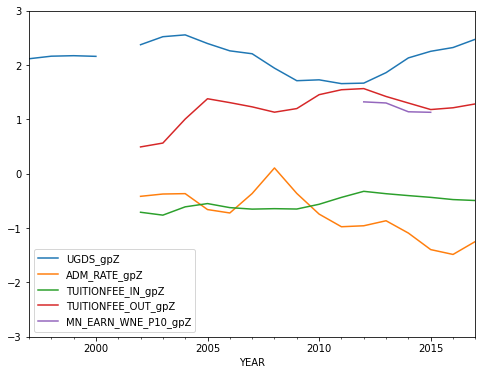

In [37]:
### Plotting Z-score trends
ax = davis.plot('YEAR','UGDS_gpZ')
davis.plot('YEAR','ADM_RATE_gpZ',ax=ax)
davis.plot('YEAR','TUITIONFEE_IN_gpZ',ax=ax)
davis.plot('YEAR','TUITIONFEE_OUT_gpZ',ax=ax)
davis.plot('YEAR','MN_EARN_WNE_P10_gpZ',ax=ax)
ax.set_ylim([-3,3])
ax.figure.set_size_inches([8,6])
ax